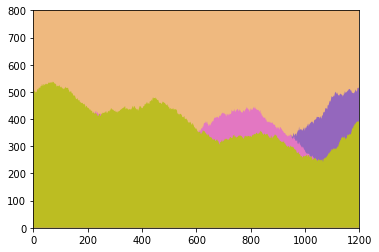

In [139]:
#!/usr/bin/python3.7
#FE_ART.ipynb
#Parth Parakh
#purpose: based on code by Mianzhi Wang in Matlab
#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.artist import Artist as Ar
#----------------------------------------------------------------------
#helper function

#PLOT_MOUNTAINS : Plots mountains.
def plot_mountains():
    #set up figure
    fig,ax = plt.subplots(1)
    #ax.imshow()
    canvas_width = 1200;
    canvas_height = 800;

    #generation parameters
    base_sin_period = 1.0 * canvas_width;           # controls the number of summits
    base_amp = 0.14 * canvas_height;                # controls altitude variation
    base_noise_var = 4;                             # controls the noise strength
    decay = 0.8;                                    # controls the decaying factor for farther mountains
    n_mountain = 6;                                 # no of mountains
    #color configurations
    mountain_color = [216,171,132];
    mountain_color[:] = [x / 255 for x in mountain_color]
    sun_center_color = [254,243,105]
    sun_center_color[:] = [x / 255 for x in sun_center_color]
    sun_edge_color = [248,130,6];
    sun_edge_color[:] = [x / 255 for x in sun_edge_color]
    sky_color = [239,185,127];
    sky_color[:] = [x / 255 for x in sky_color]
     
    #draw the background (sky)
    rect = patches.Rectangle((0,0),canvas_width,canvas_height,linewidth=0,edgecolor='none',facecolor=sky_color)
    ax.add_patch(rect)
    color = [0,0,0];
    #draw the mountains, from the farthest one to the nearest one
    for ii in range(1,n_mountain):
        y = ii / (n_mountain + 3) * canvas_height;
        # give lighter colors for farther mountains
        color[:] = [x*(ii/n_mountain/1.5) for x in mountain_color]
        # reduce the amount of superimposed Brownian motion and noise for father
        # mountains
        amp = base_amp*(decay**(ii - 1));
        noise_var = base_noise_var*(decay**(ii - 1));
        # give more summits to farther mountains
        sin_period = base_sin_period * (1.0 - (ii - 1) / n_mountain);
        draw_mountain_range(y, sin_period, amp, noise_var, 800, color,canvas_height,canvas_width);
    
    #draw the sunlight
    draw_sunlight(sun_center_color, sun_edge_color, 0.03,canvas_height,canvas_width);
    # update axis config
    plt.axis('scaled')
    plt.xlim(0,canvas_width)
    plt.ylim(0,canvas_height) 
    plt.show()

def draw_mountain_range(y, sin_period, amp, noise_var, n, color,canvas_height,canvas_width): 
    
    bm_ratio = 0.15;                                # controls the amplitude of the Brownian motion 
    x_grid = np.linspace(0,canvas_width, num=n);
    phase_offset = (y / canvas_height) * 4 * np.pi;
    thetas = x_grid * 2 * np.pi / sin_period;
    # use the sum of two sine functions as the base curve
    base = np.sin(phase_offset + thetas);
    base = base + np.sin(phase_offset + 0.3 * thetas);
    base = base * amp;
    # add Brownian motion
    bm = np.cumsum(np.sqrt(bm_ratio * amp) * np.random.normal(0,1,(1, n)));
    # add Gaussian noise
    final_curve = y + base + bm + noise_var * np.random.normal(0,1,(1, n));
    
    a = np.array([0,0]).reshape((1,2))
    b = np.transpose(x_grid).reshape((800,1))
    c = np.transpose(final_curve).reshape((800,1))
    d = np.concatenate((b,c),axis=1)
    e = np.array([canvas_width,0]).reshape((1,2))
    vertices = np.concatenate((a,d,e,a),axis=0);  
    # prepare vertices for the fill functions
    # draw the current mountain
    plt.fill(vertices[:,0],vertices[:,1],color);                      

def draw_sunlight(c_color, e_color, randomness,canvas_height,canvas_width):
    n_tri = 20; #number of triangles
    theta = np.linspace(-np.pi/2,0,n_tri+1);
    theta = np.transpose(theta);                          
    diag_length = np.sqrt(canvas_height**2 + canvas_width**2);
    # adding some randomness to the radius to mimic the effect of sunlight
    a = randomness*np.random.standard_normal((n_tri + 1, 1))
    for i in range(0,n_tri+1):
        a[i] = min(a[i],1)
        a[i] = max(a[i],-1)
        
    radius = diag_length * (1.0 + a[i] );
    # building the drawing parameters for patch
    
    Ar.FaceColor = 'interp';
    Ar.FaceAlpha = 'interp';
    
    a = np.array([[0,canvas_height]])
    b = np.array([radius*np.cos(theta),canvas_height+radius*np.sin(theta)])
    Ar.Vertices = np.concatenate((a,np.transpose(b)),axis = 0);
    
    a = np.arange(3,(n_tri+3)).reshape((20,1));
    b = np.arange(2,(n_tri+2)).reshape((20,1));
    c = np.ones((n_tri,1));
    Ar.Faces = np.concatenate((c,a,b),axis=1);
      
    a = np.transpose(np.tile(e_color,(n_tri+1,1)))
    b = np.array(c_color).reshape(3,1);
    c = np.concatenate((a,b),axis=1)
    Ar.FaceVertexCData = np.concatenate(c);
    
    a = 0.0*np.ones((n_tri+1,1))
    b = np.array([1]).reshape(1,1)
    Ar.FaceVertexAlphaData = np.concatenate((b,a),axis=0);
                              
if __name__ == "__main__":
    plot_mountains()